<a href="https://colab.research.google.com/github/NayeonKeum/ToyProjects/blob/master/cafe/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

! ! r에게 건내주기 위해 최대한 많이, 숫자로(범주형,연속형) 살려놓기
함부러 삭제 안하기로

한글 깨짐 해결->맨처음에 실행해주고 런타임 재시작하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_2020cafe/inheo_final.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33918 entries, 0 to 33917
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   개방자치단체코드    33918 non-null  int64  
 1   관리번호        33918 non-null  object 
 2   자치구명        33918 non-null  object 
 3   행정동명        33545 non-null  object 
 4   년도          33598 non-null  float64
 5   인허가일자       33918 non-null  object 
 6   폐업일자        33918 non-null  object 
 7   영업상태코드      33918 non-null  int64  
 8   영업상태명       33918 non-null  object 
 9   폐업구분        21006 non-null  object 
 10  업소일련번호      33598 non-null  float64
 11  사업장명        33650 non-null  object 
 12  X           32997 non-null  float64
 13  Y           32997 non-null  float64
 14  시설총규모       33918 non-null  float64
 15  규모분기        33918 non-null  int64  
 16  총층수         6956 non-null   float64
 17  총층수1        7969 non-null   float64
 18  업소위치        23755 non-null  object 
 19  업소위치분기      33918 non-nul

In [ ]:
data.head()

,개방자치단체코드,관리번호,자치구명,행정동명,년도,인허가일자,폐업일자,영업상태코드,영업상태명,폐업구분,업소일련번호,사업장명,X,Y,시설총규모,규모분기,총층수,총층수1,업소위치,업소위치분기,영업기간,당월_매출_금액,상권_코드,당월_매출_건수,점포수,cluster_id,역이름,SX,SY,호선,distance,d_code
0,3000000,3000000-104-1990-09100,종로구,사직동,1990.0,1990-09-03,2000-09-06,2,폐업,자진폐업,9100.0,삼광다방,126.970654,37.576068,74.47,7,NaN,NaN,NaN,1,3656,NaN,NaN,NaN,NaN,10.0,경복궁역,126.973669,37.575788,03호선,0.26746,1
1,3000000,3000000-104-1990-09107,종로구,사직동,1990.0,1990-09-03,2004-09-07,2,폐업,자진폐업,9107.0,대경,126.970422,37.576234,99.21,9,4.0,NaN,NaN,1,5118,NaN,NaN,NaN,NaN,10.0,경복궁역,126.973669,37.575788,03호선,0.29035,2
2,3000000,3000000-104-1990-09129,종로구,종로1.2.3.4가동,1990.0,1990-08-22,1996-06-13,2,폐업,자진폐업,9129.0,국빈다방,126.986778,37.570982,32.00,3,NaN,4.0,NaN,1,2122,NaN,NaN,NaN,NaN,205.0,종각역,126.983134,37.570222,01호선,0.33209,2
3,3000000,3000000-104-1990-09181,종로구,숭인제2동,1990.0,1990-12-22,1994-09-07,2,폐업,자진폐업,9181.0,나드리커피숍,127.018736,37.574082,139.00,10,NaN,NaN,NaN,1,1355,NaN,NaN,NaN,NaN,64.0,동묘앞역,127.016346,37.573213,06호선,0.23171,1
4,3000000,3000000-104-1990-09188,종로구,숭인제1동,1990.0,1990-07-13,2000-08-17,2,폐업,자진폐업,9188.0,석다방,127.015994,37.573633,115.84,9,NaN,NaN,NaN,1,3688,NaN,NaN,NaN,NaN,64.0,동묘앞역,127.016346,37.573213,06호선,0.05603,1


쓸모 없는 데이터 삭제

In [ ]:
feat_drop=['개방자치단체코드','관리번호','업소일련번호', '폐업구분','상권_코드','총층수','업소위치']
data=data.drop(feat_drop, axis=1)

In [ ]:
data.shape

(33918, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33918 entries, 0 to 33917
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구명        33918 non-null  object 
 1   행정동명        33545 non-null  object 
 2   년도          33598 non-null  float64
 3   인허가일자       33918 non-null  object 
 4   폐업일자        33918 non-null  object 
 5   영업상태코드      33918 non-null  int64  
 6   영업상태명       33918 non-null  object 
 7   사업장명        33650 non-null  object 
 8   X           32997 non-null  float64
 9   Y           32997 non-null  float64
 10  시설총규모       33918 non-null  float64
 11  규모분기        33918 non-null  int64  
 12  총층수1        7969 non-null   float64
 13  업소위치분기      33918 non-null  int64  
 14  영업기간        33918 non-null  int64  
 15  당월_매출_금액    15809 non-null  float64
 16  당월_매출_건수    15809 non-null  float64
 17  점포수         15809 non-null  float64
 18  cluster_id  32997 non-null  float64
 19  역이름         32997 non-nul

In [ ]:
data.isnull().sum()

자치구명              0
행정동명            373
년도              320
인허가일자             0
폐업일자              0
영업상태코드            0
영업상태명             0
사업장명            268
X               921
Y               921
시설총규모             0
규모분기              0
총층수1          25949
업소위치분기            0
영업기간              0
당월_매출_금액      18109
당월_매출_건수      18109
점포수           18109
cluster_id      921
역이름             921
SX              921
SY              921
호선              921
distance        921
d_code            0
dtype: int64

*빈것들* 채우기-> 함부러 하는거 아냐. r로 돌려보았다. c://users//user/수업자료~~~~/데분활/fillnan.R

In [ ]:

#년도 다시 적기
data["인허가일자"] = pd.to_datetime(data["인허가일자"])
data["년도"] = data['인허가일자'].dt.year

#data['영업기간']=data['영업기간'].fillna(data.groupby("행정동명")['영업기간'].transform("median"), inplace=True)
data["총층수1"]=data["총층수1"].fillna(1)

#좌표를 채우기 평균으로 채우기
data['X'].fillna(data.groupby("행정동명")['X'].transform("mean"), inplace=True)
data['Y'].fillna(data.groupby("행정동명")['Y'].transform("mean"), inplace=True)


In [ ]:
#매출 따로 계산해야지
data_income=data
data_income=data_income.dropna(axis=0)
data_income.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 8 to 33916
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구명        15416 non-null  object        
 1   행정동명        15416 non-null  object        
 2   년도          15416 non-null  int64         
 3   인허가일자       15416 non-null  datetime64[ns]
 4   폐업일자        15416 non-null  object        
 5   영업상태코드      15416 non-null  int64         
 6   영업상태명       15416 non-null  object        
 7   사업장명        15416 non-null  object        
 8   X           15416 non-null  float64       
 9   Y           15416 non-null  float64       
 10  시설총규모       15416 non-null  float64       
 11  규모분기        15416 non-null  int64         
 12  총층수1        15416 non-null  float64       
 13  업소위치분기      15416 non-null  int64         
 14  영업기간        15416 non-null  int64         
 15  당월_매출_금액    15416 non-null  float64       
 16  당월_매출_건수    15416 non-

In [ ]:
#매출에서 쓸 것들 빼고
feat_drop=['당월_매출_금액','당월_매출_건수','점포수']
data=data.drop(feat_drop, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33918 entries, 0 to 33917
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구명        33918 non-null  object        
 1   행정동명        33545 non-null  object        
 2   년도          33918 non-null  int64         
 3   인허가일자       33918 non-null  datetime64[ns]
 4   폐업일자        33918 non-null  object        
 5   영업상태코드      33918 non-null  int64         
 6   영업상태명       33918 non-null  object        
 7   사업장명        33650 non-null  object        
 8   X           33906 non-null  float64       
 9   Y           33906 non-null  float64       
 10  시설총규모       33918 non-null  float64       
 11  규모분기        33918 non-null  int64         
 12  총층수1        33918 non-null  float64       
 13  업소위치분기      33918 non-null  int64         
 14  영업기간        33918 non-null  int64         
 15  cluster_id  32997 non-null  float64       
 16  역이름         32997 non-

In [ ]:
#이 외 invalid 다 탈락
data=data.dropna(axis=0)

#영업 년도의 한계를 2019로 잘라버리는 바람에 실패율이 높아졌다. 2019이상의 값을 삭제하자
indexn=data[data['년도']>=2019].index
data.drop(indexn,inplace=True)

In [ ]:
#index다시 만들어주기
data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30079 entries, 0 to 33820
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구명        30079 non-null  object        
 1   행정동명        30079 non-null  object        
 2   년도          30079 non-null  int64         
 3   인허가일자       30079 non-null  datetime64[ns]
 4   폐업일자        30079 non-null  object        
 5   영업상태코드      30079 non-null  int64         
 6   영업상태명       30079 non-null  object        
 7   사업장명        30079 non-null  object        
 8   X           30079 non-null  float64       
 9   Y           30079 non-null  float64       
 10  시설총규모       30079 non-null  float64       
 11  규모분기        30079 non-null  int64         
 12  총층수1        30079 non-null  float64       
 13  업소위치분기      30079 non-null  int64         
 14  영업기간        30079 non-null  int64         
 15  cluster_id  30079 non-null  float64       
 16  역이름         30079 non-

In [ ]:
data.isnull().sum()

자치구명          0
행정동명          0
년도            0
인허가일자         0
폐업일자          0
영업상태코드        0
영업상태명         0
사업장명          0
X             0
Y             0
시설총규모         0
규모분기          0
총층수1          0
업소위치분기        0
영업기간          0
cluster_id    0
역이름           0
SX            0
SY            0
호선            0
distance      0
d_code        0
dtype: int64

추가하기

In [ ]:
#-성공여부
r=[0,730,999999]#일단 2년을 성공기준
g=[0,1]
data['성공여부']=pd.cut(data['영업기간'],bins=r,labels=g)
data['성공여부']=data['성공여부'].fillna(0)#확인사살
#data=data.drop('영업기간',axis=1)
data['성공여부']

0        1
1        1
2        1
3        1
4        1
        ..
33815    1
33816    1
33817    1
33818    0
33820    0
Name: 성공여부, Length: 30079, dtype: category
Categories (2, int64): [0 < 1]

In [ ]:
#-창업월
data["인허가일자"] = pd.to_datetime(data["인허가일자"])
data['창업월'] = data['인허가일자'].dt.month
data['창업월']

0         9
1         9
2         8
3        12
4         7
         ..
33815    11
33816    12
33817    12
33818    12
33820    12
Name: 창업월, Length: 30079, dtype: int64

In [ ]:
#-폐업월
data["폐업일자"] = pd.to_datetime(data["폐업일자"])
data['폐업월'] = data['폐업일자'].dt.month
#data=data.drop('인허가일자',axis=1)
data['폐업월']

0         9
1         9
2         6
3         9
4         8
         ..
33815    12
33816    12
33817    12
33818    12
33820     1
Name: 폐업월, Length: 30079, dtype: int64

In [ ]:
#gu mapping
gu_mapping={"강남구":1, "서초구":2, "마포구":3, '중구':4,'종로구':5,'영등포':6,'강서구':7,'송파구':8,'관악구':9,'강동구':10,'서대문':11,'동대문':12,'성북구':13,'구로구':14,'양천구':15,'노원구':16,'용산구':17,'광진구':18,'동작구':19,'은평구':20,'성동구':21,'중랑구':22,'금천구':23,'도봉구':24,'강북구':25}
data['구_1_25']=data['자치구명'].map(gu_mapping)
#data=data.drop('자치구명',axis=1)
data['구_1_25']

0         5
1         5
2         5
3         5
4         5
         ..
33815    10
33816    10
33817    10
33818    10
33820    10
Name: 구_1_25, Length: 30079, dtype: int64

In [ ]:
#호선 추출하기
data['sub_1_9']=data['호선'].str[:2]
data['sub_1_9']


0        03
1        03
2        01
3        06
4        06
         ..
33815    05
33816    08
33817    05
33818    05
33820    08
Name: sub_1_9, Length: 30079, dtype: object

In [ ]:
import plotly.express as px
is_franchise=data['사업장명'].str.contains("이디야|스타벅스|투썸|달콤커피|커피베이|할리스|탐앤탐스|폴바셋|커피나무|파스쿠찌|파스쿠치|빽다방|빈스빈스|엔제리너스|엔젤리너스|커피명가|카페베네|커피스미스|드롭탑|커피마마|더착한커피|더카페|커피에반하다|매머드커피|주커피|토프레소|카페보니또|전광수커피|그라찌에|띠아모|커피빈|더벤티|스무디킹")
#사업장명이 없는 건 프랜차이즈 아닌걸로하자
is_super_franchise=data['사업장명'].str.contains("이디야|스타벅스|투썸")
data["프랜차이즈여부_02"]=0
is_franchise=is_franchise.fillna(0)
is_super_franchise=is_super_franchise.fillna(0)
is_franchise=is_franchise.astype(int)
is_super_franchise=is_super_franchise.astype(int)
for i in range(0,40766):
  try:
    data["프랜차이즈여부_02"][i]=is_franchise[i]+is_super_franchise[i]
  except KeyError:
    continue
data["프랜차이즈여부_02"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        0
1        0
2        0
3        0
4        0
        ..
33815    0
33816    0
33817    2
33818    0
33820    0
Name: 프랜차이즈여부_02, Length: 30079, dtype: int64

시각화 시작


In [ ]:
%matplotlib inline
import seaborn as sns
sns.set()

한글 깨짐 해결


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
def bar_charty(feature):
  Success=data[data['성공여부']==1][feature].value_counts()
  Fail=data[data['성공여부']==0][feature].value_counts()
  df=pd.DataFrame([Success,Fail])
  df.index=['성공',"실패"]
  df.plot(kind='bar',stacked=True, figsize=(10,5))

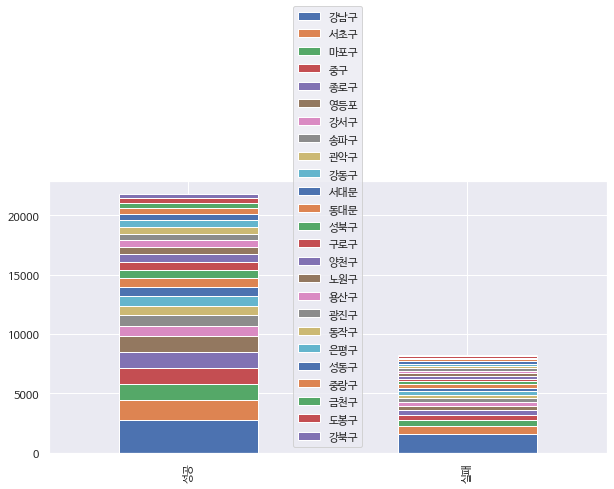

In [ ]:
bar_charty('자치구명')

In [ ]:
#bar_charty('행정동명') 너무 많음

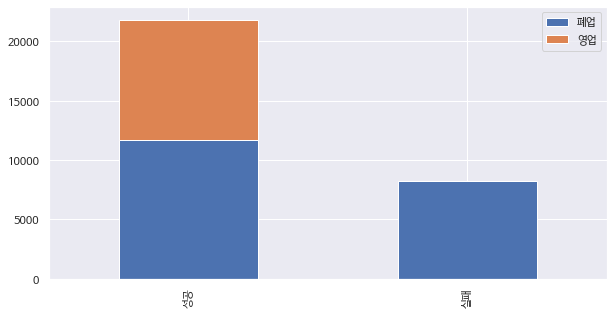

In [ ]:
bar_charty('영업상태명')

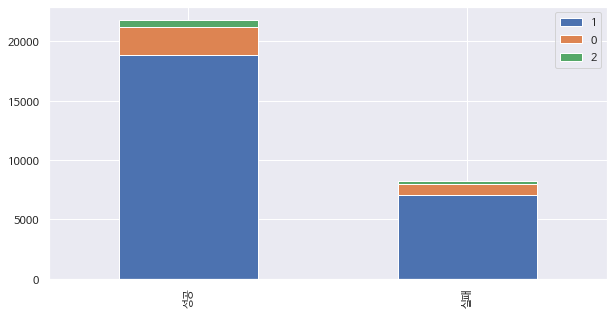

In [ ]:
bar_charty('업소위치분기')#->2층이상이 매우매우 작아 층을 지하, 지상, 2층이상으로 하기로 했다

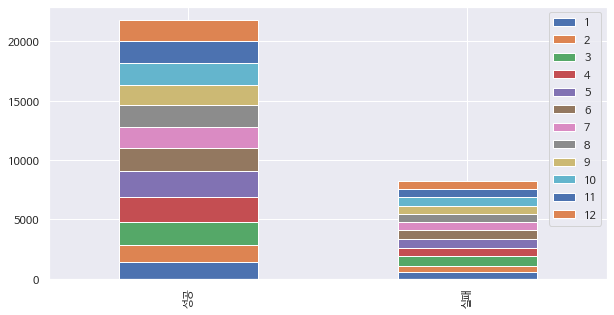

In [ ]:
bar_charty('창업월')

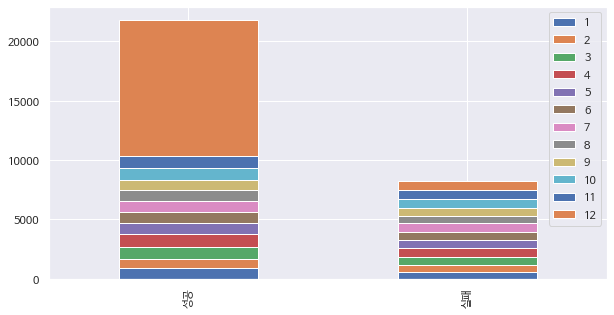

In [ ]:
 bar_charty('폐업월') #미래 데이터랑 상관이 없지만 과거데이터에서 활용하기(예시, 이 월을 조심하시오)
 #데이터 없는 것들 다 12월로 해서 이케 됐나봄

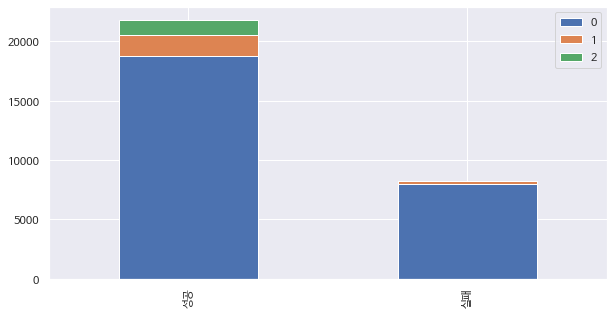

In [ ]:
bar_charty('프랜차이즈여부_02')

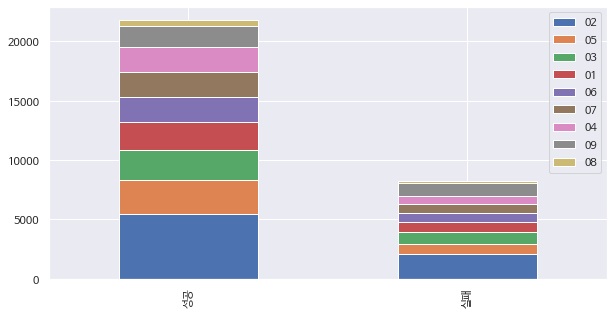

In [ ]:
bar_charty('sub_1_9')#->순위별로 다시 매핑해줬따

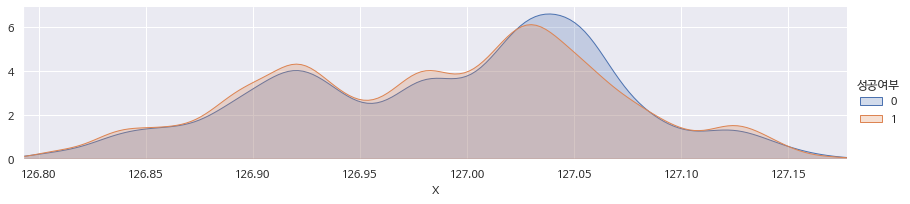

In [ ]:
facet=sns.FacetGrid(data, hue='성공여부', aspect=4)
facet.map(sns.kdeplot, 'X',shade=True)
facet.set(xlim=(data['X'].min(),data['X'].max()))
facet.add_legend() 

import matplotlib.pyplot as plt
plt.show()
#1영업, 2폐업

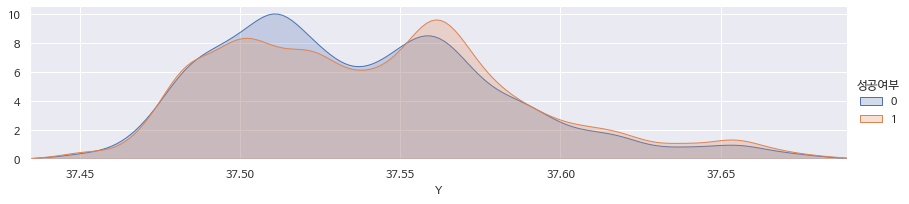

In [ ]:
facet=sns.FacetGrid(data, hue='성공여부', aspect=4)
facet.map(sns.kdeplot, 'Y',shade=True)
facet.set(xlim=(data['Y'].min(),data['Y'].max()))
facet.add_legend()

import matplotlib.pyplot as plt
plt.show()

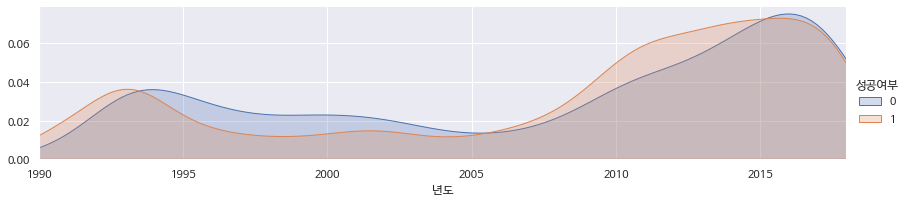

In [ ]:
facet=sns.FacetGrid(data, hue='성공여부', aspect=4)
facet.map(sns.kdeplot,'년도',shade=True)
facet.set(xlim=(data['년도'].min(),data['년도'].max()))
facet.add_legend()

import matplotlib.pyplot as plt
plt.show()
#양상문제 : 폐업일자의 결측치를 전부 2019.12.31로 잡았고, 성공 여부를 2년으로 두었기 때문에 2017년 근방의 데이터는 무의미하다.

In [ ]:
#지하철 재매핑 : 성공률 순
sub_mapping={"02호선":1, "05호선":2, "03호선":3, '01호선':4,'06호선':5,'07호선':6,'04호선':7,'09호선':8,'08호선':9}
data['sub_19']=data['호선'].map(sub_mapping)

In [ ]:
data.head()

,자치구명,행정동명,년도,인허가일자,폐업일자,영업상태코드,영업상태명,사업장명,X,Y,시설총규모,규모분기,총층수1,업소위치분기,영업기간,cluster_id,역이름,SX,SY,호선,distance,d_code,성공여부,창업월,폐업월,구_1_25,sub_1_9,프랜차이즈여부_02,sub_19
0,종로구,사직동,1990,1990-09-03,2000-09-06,2,폐업,삼광다방,126.970654,37.576068,74.47,7,1.0,1,3656,10.0,경복궁역,126.973669,37.575788,03호선,0.26746,1,1,9,9,5,03,0,3
1,종로구,사직동,1990,1990-09-03,2004-09-07,2,폐업,대경,126.970422,37.576234,99.21,9,1.0,1,5118,10.0,경복궁역,126.973669,37.575788,03호선,0.29035,2,1,9,9,5,03,0,3
2,종로구,종로1.2.3.4가동,1990,1990-08-22,1996-06-13,2,폐업,국빈다방,126.986778,37.570982,32.00,3,4.0,1,2122,205.0,종각역,126.983134,37.570222,01호선,0.33209,2,1,8,6,5,01,0,4
3,종로구,숭인제2동,1990,1990-12-22,1994-09-07,2,폐업,나드리커피숍,127.018736,37.574082,139.00,10,1.0,1,1355,64.0,동묘앞역,127.016346,37.573213,06호선,0.23171,1,1,12,9,5,06,0,5
4,종로구,숭인제1동,1990,1990-07-13,2000-08-17,2,폐업,석다방,127.015994,37.573633,115.84,9,1.0,1,3688,64.0,동묘앞역,127.016346,37.573213,06호선,0.05603,1,1,7,8,5,06,0,5


In [ ]:
#노쓸모 드랍

feat_drop=['영업상태코드','년도','자치구명','cluster_id','역이름','폐업월','행정동명','폐업일자','인허가일자','영업기간','영업상태명','Y','X','SX','SY','규모분기','영업기간','총층수1','d_code','호선','sub_1_9']
data=data.drop(feat_drop, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30079 entries, 0 to 33820
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   사업장명        30079 non-null  object  
 1   시설총규모       30079 non-null  float64 
 2   업소위치분기      30079 non-null  int64   
 3   distance    30079 non-null  float64 
 4   성공여부        30079 non-null  category
 5   창업월         30079 non-null  int64   
 6   구_1_25      30079 non-null  int64   
 7   프랜차이즈여부_02  30079 non-null  int64   
 8   sub_19      30079 non-null  int64   
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 3.3+ MB


In [ ]:
data.head()

,사업장명,시설총규모,업소위치분기,distance,성공여부,창업월,구_1_25,프랜차이즈여부_02,sub_19
0,삼광다방,74.47,1,0.26746,1,9,5,0,3
1,대경,99.21,1,0.29035,1,9,5,0,3
2,국빈다방,32.00,1,0.33209,1,8,5,0,4
3,나드리커피숍,139.00,1,0.23171,1,12,5,0,5
4,석다방,115.84,1,0.05603,1,7,5,0,5


In [ ]:
#비복원추출
test=data.sample(frac=0.3,replace=False,random_state=1)
train=data.sample(frac=0.7,replace=False,random_state=7)
'''
test=data[23300:]#3:7
train=data[:23300]
'''
train=train.drop(['사업장명'], axis=1)

In [ ]:
train_data=train.drop('성공여부',axis=1)
train_data.shape


(21055, 7)

In [ ]:
test.shape

(9024, 9)

In [ ]:
train_data.head()

,시설총규모,업소위치분기,distance,창업월,구_1_25,프랜차이즈여부_02,sub_19
32243,451.18,1,1.10014,12,8,2,8
11737,60.55,1,1.62516,5,20,0,5
27874,54.09,0,0.40774,7,1,1,1
19133,55.50,1,2.78004,2,23,0,4
29605,82.50,1,0.34979,7,1,0,6


In [ ]:
test.head()

,사업장명,시설총규모,업소위치분기,distance,성공여부,창업월,구_1_25,프랜차이즈여부_02,sub_19
5888,갈채다방,72.47,1,0.55981,1,7,18,0,1
3643,텀브커피 무교동점,26.44,0,0.20197,0,3,4,0,1
21085,더카페엔여의도백화점점,11.50,1,0.06886,1,9,6,1,2
18707,바이올렛에스프레소,28.16,1,0.42604,1,4,14,0,6
1422,카슈카슈,33.60,1,0.30925,1,3,5,0,2


In [ ]:
data_income.to_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/data_income_inheo.csv")

In [ ]:
data.to_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/data_inheo.csv")

In [ ]:
train.to_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/train_inheo.csv")
train_data.to_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/train_data_inheo.csv")
test.to_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/test_inheo.csv")